# need to be cleaned

In [1]:
#Data Analysis
import pandas as pd
import numpy as np
# Modeling
import statsmodels.api as sm
from pygam import GAM, ExpectileGAM, s, f
from sklearn.preprocessing import LabelEncoder
# Visualization
import plotly.express as px
from plotnine import *
import pytimetk as tk
import textwrap 

In [19]:
import matplotlib as plt

In [3]:
df = pd.read_excel('reservations.xlsx')

In [4]:
df

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,occ rate,paid price,nbre res
0,2024-01-01,single,2,False,2023-12-30,winter,1,1,False,0.438,728.13,175
1,2024-01-01,single,62,False,2023-10-31,winter,1,1,False,0.437,676.01,175
2,2024-01-01,single,71,False,2023-10-22,winter,1,1,False,0.438,667.57,175
3,2024-01-01,single,49,False,2023-11-13,winter,1,1,True,0.418,639.01,167
4,2024-01-01,single,0,False,2024-01-01,winter,1,1,False,0.412,722.32,165
...,...,...,...,...,...,...,...,...,...,...,...,...
267970,2025-06-30,family,80,False,2025-04-11,summer,6,30,False,0.413,1458.47,83
267971,2025-06-30,family,12,False,2025-06-18,summer,6,30,False,0.414,1567.79,83
267972,2025-06-30,family,6,False,2025-06-24,summer,6,30,True,0.408,1479.28,82
267973,2025-06-30,family,5,False,2025-06-25,summer,6,30,True,0.411,1470.13,82


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
arrival day,267975,NaN,NaN,NaN,2024-09-30 20:34:39.113350400,2024-01-01 00:00:00,2024-05-07 00:00:00,2024-10-06 00:00:00,2025-02-21 00:00:00,2025-06-30 00:00:00,NaN
type de chambre,267975,3,single,119100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking lead,267975.0,NaN,NaN,NaN,37.808557,0.0,15.0,31.0,61.0,90.0,26.623876
is-week-end,267975,2,False,219483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
res day,267975,NaN,NaN,NaN,2024-08-24 01:10:19.808563968,2023-10-03 00:00:00,2024-04-01 00:00:00,2024-08-29 00:00:00,2025-01-13 00:00:00,2025-06-30 00:00:00,NaN
season,267975,4,printemps,107091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arr month,267975.0,NaN,NaN,NaN,5.507876,1.0,3.0,5.0,8.0,12.0,3.25926
arr day,267975.0,NaN,NaN,NaN,15.693535,1.0,8.0,16.0,23.0,31.0,8.811536
is_promo,267975,2,False,200922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occ rate,267975.0,NaN,NaN,NaN,0.700766,0.15,0.552,0.675,0.871,1.09,0.208947


In [ ]:
# Créer la colonne "revenue par type de chambre"
df["revenue par type"] = df["nbre res"] * df["paid price "]

# Arrondir le résultat à 2 chiffres après la virgule (optionnel)
df["revenue par type"] = df["revenue par type"].round(2)

# Sauvegarder dans le même fichier
df.to_excel("reservations1.xlsx", index=False)


In [6]:
df1 = pd.read_excel('reservations1.xlsx')

In [7]:
df1

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,occ rate,paid price,nbre res,revenue par type
0,2024-01-01,single,2,False,2023-12-30,winter,1,1,False,0.438,728.13,175,127422.75
1,2024-01-01,single,62,False,2023-10-31,winter,1,1,False,0.437,676.01,175,118301.75
2,2024-01-01,single,71,False,2023-10-22,winter,1,1,False,0.438,667.57,175,116824.75
3,2024-01-01,single,49,False,2023-11-13,winter,1,1,True,0.418,639.01,167,106714.67
4,2024-01-01,single,0,False,2024-01-01,winter,1,1,False,0.412,722.32,165,119182.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267970,2025-06-30,family,80,False,2025-04-11,summer,6,30,False,0.413,1458.47,83,121053.01
267971,2025-06-30,family,12,False,2025-06-18,summer,6,30,False,0.414,1567.79,83,130126.57
267972,2025-06-30,family,6,False,2025-06-24,summer,6,30,True,0.408,1479.28,82,121300.96
267973,2025-06-30,family,5,False,2025-06-25,summer,6,30,True,0.411,1470.13,82,120550.66


In [3]:
#this model is valid for 2, 3, 4, 5, 9, 10, 11 months, room_type=single, week-end=false, no_promo
filtered_df = df[
    (df['arr month'].isin([3])) &
    (df['is-week-end'] == False) &
    (df['is_promo'] == False) &
    (df['type de chambre'] == 'single')&
    (df['booking lead'] <= 10)
].drop_duplicates(subset=['res day'], keep='first')

X = filtered_df[['paid price ']]
y= filtered_df['nbre res']

print(len(X)) 

77


In [4]:
# Display the first 5 values
print("X (paid price):")
print(X.head())

print("\ny (nbre res):")
print(y.head())

X (paid price):
       paid price 
26433       685.02
26437       691.07
26438       685.69
26440       683.49
26468       691.37

y (nbre res):
26433    349
26437    348
26438    343
26440    340
26468    342
Name: nbre res, dtype: int64


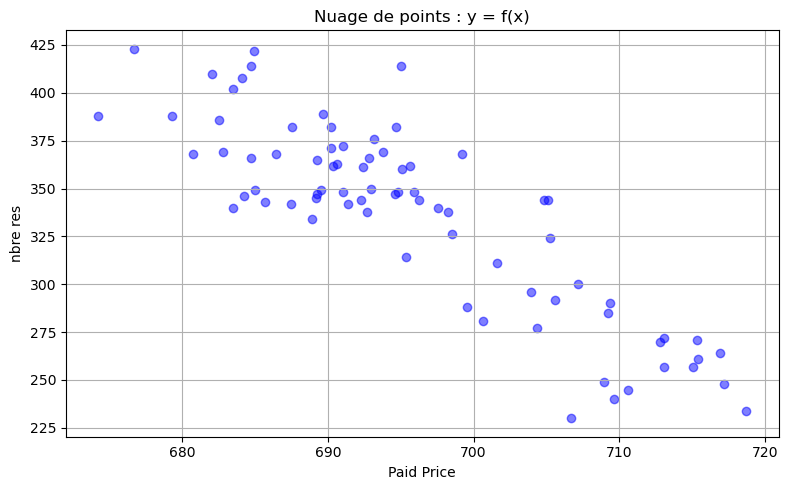

In [5]:
# Tracer les points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("Paid Price")
plt.ylabel("nbre res")
plt.title("Nuage de points : y = f(x)")
plt.grid(True)
plt.tight_layout()
plt.show()


--- Summary for 2th Expectile ---
ExpectileGAM                                                                                              
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.5131
Link Function:                     IdentityLink Log Likelihood:                                  -631.8477
Number of Samples:                           77 AIC:                                             1278.7216
                                                AICc:                                            1280.5894
                                                GCV:                                             1720.3145
                                                Scale:                                           1460.5422
                                                Pseudo R-Squared:                                   0.4478
Fe

C:\Users\DELL\AppData\Local\Temp\ipykernel_16688\2856595816.py:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())  # Just call it; don't assign it
C:\Users\DELL\AppData\Local\Temp\ipykernel_16688\2856595816.py:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())  # Just call it; don't assign it
C:\Users\DELL\AppData\Local\Temp\ipykernel_16688\2856595816.py:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, a

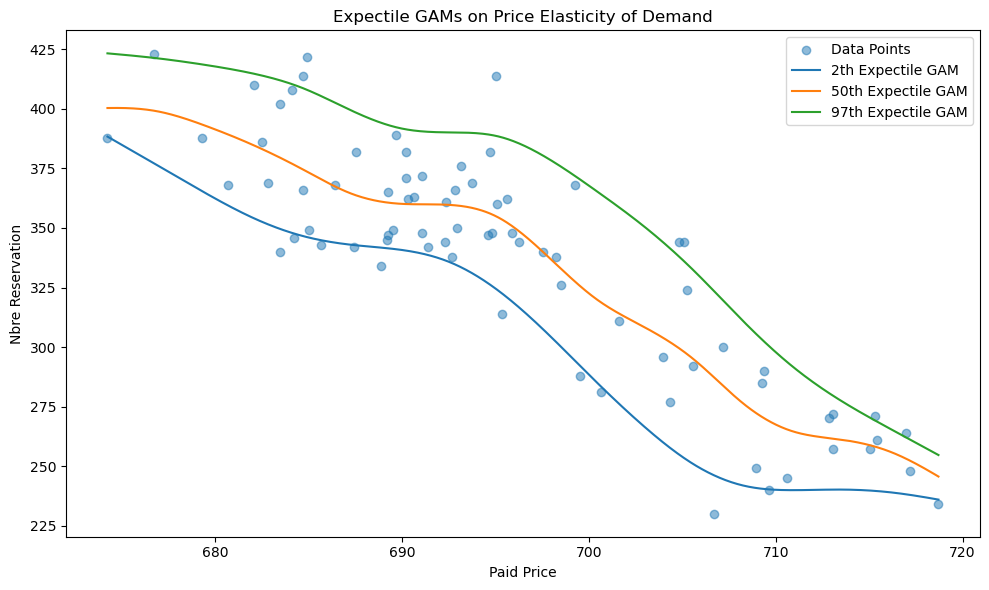

In [7]:
#Price_demand model with 
# Define expectiles (quantiles equivalent for ExpectileGAM)
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

# Fit an ExpectileGAM for each quantile
summaries = {}
for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[q] = gam
    print(f"\n--- Summary for {int(q*100)}th Expectile ---")
    print(gam.summary())  # Just call it; don't assign it

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')

# Create evenly spaced X values for predictions
XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Plot each fitted GAM curve
for q, gam in gam_results.items():
    plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Expectile GAM')

# Customize plot
plt.xlabel('Paid Price')
plt.ylabel('Nbre Reservation')
plt.title('Expectile GAMs on Price Elasticity of Demand')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
!pip install plotnine

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 2.1 MB/s eta 0:00:01
   -------------------------------- ------- 1.0/1.3 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 2.1 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [plotnine]
   -------------------- ------------------- 1/2 [plotnine]
   -------------------- ------------------- 1/2 [plotnine]
   ---------------------------------------- 2/2 [plotnine]



In [13]:

# Modeling
import statsmodels.api as sm
from pygam import GAM, ExpectileGAM, s, f
from sklearn.preprocessing import LabelEncoder

# Visualization
import plotly.express as px
from plotnine import *


In [23]:
#this model is valid for 2, 3, 4, 5, 9, 10, 11 months, room_type=single, week-end=false, no_promo
filtered_df1 = df[
    (df['arr month'].isin([3])) &
    (df['is-week-end'] == False) &
    (df['is_promo'] == False) &
    #(df['type de chambre'] == 'single')&
    (df['booking lead'] <= 20)
].drop_duplicates(subset=['res day'], keep='first')

X1 = filtered_df[['paid price ']]
y1= filtered_df['nbre res']

print(len(X1)) 

77


In [25]:
import pandas as pd

# Créer la colonne "revenue par type de chambre"
df["revenue par type"] = df["nbre res"] * df["paid price "]

# Arrondir le résultat à 2 chiffres après la virgule (optionnel)
df["revenue par type"] = df["revenue par type"].round(2)

# Sauvegarder dans le même fichier
df.to_excel("reservations1.xlsx", index=False)


In [26]:
from scipy.optimize import minimize_scalar

In [28]:
filtered_df = df[
    (df['arr month'].isin([3])) &
    (df['is-week-end'] == False) &
    (df['is_promo'] == False) &
    (df['type de chambre'] == 'single') &
    (df['booking lead'] <= 10)
].drop_duplicates(subset=['res day'], keep='first')

X = filtered_df[['paid price ']].values
y = filtered_df['nbre res'].values

In [29]:
# Define expectiles (quantiles equivalent for ExpectileGAM)
quantiles = [0.1, 0.5, 0.9]  # Lower, median, upper quantiles
gam_results = {}

# Fit an ExpectileGAM for each quantile
for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[q] = gam

# Create prediction range
XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Calculate predictions and revenues for each quantile
predictions = {}
revenues = {}
optimal_points = {}

for q, gam in gam_results.items():
    pred = gam.predict(XX)
    predictions[q] = pred
    revenues[q] = XX * pred  # Revenue = Price * Quantity

In [31]:
# Find price that maximizes revenue for this quantile
def revenue_func(price):
    return -price * gam.predict(np.array([[price]]))[0]  # Negative for minimization

res = minimize_scalar(revenue_func, bounds=(XX.min(), XX.max()), method='bounded')
optimal_points[q] = (res.x, -res.fun)  # (optimal price, max revenue)

KeyError: 0.1

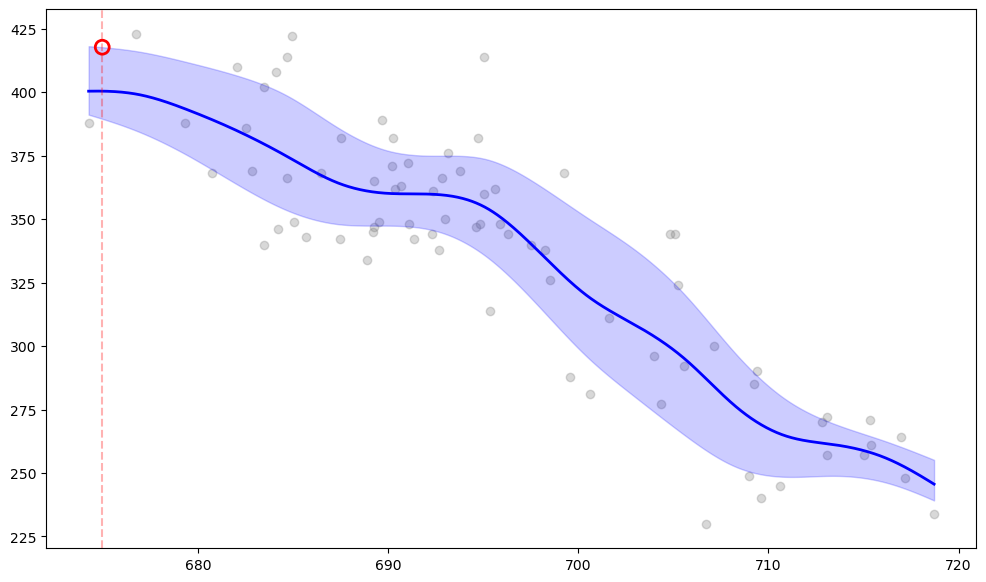

In [32]:
# Create plot
plt.figure(figsize=(12, 7))

# Plot data points
plt.scatter(X, y, alpha=0.3, color='gray', label='Data points')

# Plot median curve
median_pred = predictions[0.5]
plt.plot(XX, median_pred, color='blue', linewidth=2, label='Median (50th expectile)')

# Plot ribbon between upper and lower quantiles
plt.fill_between(XX.ravel(), predictions[0.1], predictions[0.9], 
                 color='blue', alpha=0.2, label='10th-90th expectile range')

# Highlight optimal points
for q, (opt_price, opt_revenue) in optimal_points.items():
    opt_demand = gam_results[q].predict(np.array([[opt_price]]))[0]
    plt.scatter(opt_price, opt_demand, s=100, 
               label=f'Optimal (${opt_price:.0f}, {opt_demand:.0f} rooms)',
               edgecolors='red', facecolors='none', linewidth=2)
    
    # Add vertical line at optimal price
    plt.axvline(x=opt_price, color='red', linestyle='--', alpha=0.3)

# Add revenue information to the plot
plt.text(0.02, 0.95, 
         f"Max Revenue Estimates:\n"
         f"10th: ${optimal_points[0.1][1]:.0f} @ ${optimal_points[0.1][0]:.0f}\n"
         f"50th: ${optimal_points[0.5][1]:.0f} @ ${optimal_points[0.5][0]:.0f}\n"
         f"90th: ${optimal_points[0.9][1]:.0f} @ ${optimal_points[0.9][0]:.0f}",
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('Paid Price ($)')
plt.ylabel('Number of Reservations')
plt.title('Price Elasticity of Demand with Optimal Revenue Points\n(Room Type: Single, Non-Weekend, No Promo)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Export revenue estimates to Excel
output_df = pd.DataFrame({
    'Price': XX.ravel(),
    'Demand_10th': predictions[0.1],
    'Demand_50th': predictions[0.5],
    'Demand_90th': predictions[0.9],
    'Revenue_10th': revenues[0.1].ravel(),
    'Revenue_50th': revenues[0.5].ravel(),
    'Revenue_90th': revenues[0.9].ravel()
})

# Add optimal points information
optimal_info = pd.DataFrame({
    'Quantile': ['10th', '50th', '90th'],
    'Optimal_Price': [optimal_points[0.1][0], optimal_points[0.5][0], optimal_points[0.9][0]],
    'Max_Revenue': [optimal_points[0.1][1], optimal_points[0.5][1], optimal_points[0.9][1]],
    'Demand_at_Optimal': [
        gam_results[0.1].predict(np.array([[optimal_points[0.1][0]]]))[0],
        gam_results[0.5].predict(np.array([[optimal_points[0.5][0]]]))[0],
        gam_results[0.9].predict(np.array([[optimal_points[0.9][0]]]))[0]
    ]
})

with pd.ExcelWriter('revenue_estimates.xlsx') as writer:
    output_df.to_excel(writer, sheet_name='Revenue Curves', index=False)
    optimal_info.to_excel(writer, sheet_name='Optimal Points', index=False)

print("Analysis complete. Results saved to 'revenue_estimates.xlsx'")

ValueError: All arrays must be of the same length

In [9]:
#this model is valid for 2, 3, 4, 5, 9, 10, 11 months, room_type=single, week-end=false, no_promo
filtered_df = df1[
    (df['arr month'].isin([3])) &
    (df['is-week-end'] == False) &
    (df['is_promo'] == False) &
    #(df['type de chambre'] == 'single')&
    (df['booking lead'] <= 10)
].drop_duplicates(subset=['res day'], keep='first')

X = filtered_df[['paid price ']]
y= filtered_df['nbre res']

print(len(X)) 

78


In [13]:
 # EXPLORATORY DATA ANALYSIS

# TRENDS: PRICE vs QUANTITY SOLD
fig = px.scatter(
    filtered_df,
    x='paid price ',
    y='nbre res',
    color='type de chambre',
    opacity=0.6,
    trendline='lowess',
    trendline_color_override='blue',
    template='none',
    title='Room Reservations: Price vs Quantity Analysis',
    width=800,
    height=600
).update_traces(
    marker=dict(size=7),
    hoverlabel=dict(font=dict(size=10))
).update_layout(
    legend_title_text='Product',
    title_font=dict(size=16),
    legend_font=dict(size=10)
).update_xaxes(
    title_text='Price',
    title_font=dict(size=10),
    tickfont=dict(size=10)
).update_yaxes(
    title_text='Quantity Sold',
    title_font=dict(size=10),
    tickfont=dict(size=10)
)

fig


In [12]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [14]:
filtered_df

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,occ rate,paid price,nbre res,revenue par type
26433,2024-03-01,single,2,False,2024-02-28,printemps,3,1,False,0.873,685.02,349,239071.98
26437,2024-03-01,single,1,False,2024-02-29,printemps,3,1,False,0.870,691.07,348,240492.36
26438,2024-03-01,single,7,False,2024-02-23,printemps,3,1,False,0.857,685.69,343,235191.67
26440,2024-03-01,single,9,False,2024-02-21,printemps,3,1,False,0.849,683.49,340,232386.60
26468,2024-03-01,single,5,False,2024-02-25,printemps,3,1,False,0.855,691.37,342,236448.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221104,2025-03-27,single,0,False,2025-03-27,printemps,3,27,False,0.906,690.33,362,249899.46
221859,2025-03-28,single,0,False,2025-03-28,printemps,3,28,False,0.956,687.53,382,262636.46
223275,2025-03-31,single,0,False,2025-03-31,printemps,3,31,False,0.679,713.09,272,193960.48
223507,2025-03-31,single,2,False,2025-03-29,printemps,3,31,False,0.674,712.83,270,192464.10


In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
arrival day,267975,NaN,NaN,NaN,2024-09-30 20:34:39.113350400,2024-01-01 00:00:00,2024-05-07 00:00:00,2024-10-06 00:00:00,2025-02-21 00:00:00,2025-06-30 00:00:00,NaN
type de chambre,267975,3,single,119100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking lead,267975.0,NaN,NaN,NaN,37.808557,0.0,15.0,31.0,61.0,90.0,26.623876
is-week-end,267975,2,False,219483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
res day,267975,NaN,NaN,NaN,2024-08-24 01:10:19.808563968,2023-10-03 00:00:00,2024-04-01 00:00:00,2024-08-29 00:00:00,2025-01-13 00:00:00,2025-06-30 00:00:00,NaN
season,267975,4,printemps,107091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arr month,267975.0,NaN,NaN,NaN,5.507876,1.0,3.0,5.0,8.0,12.0,3.25926
arr day,267975.0,NaN,NaN,NaN,15.693535,1.0,8.0,16.0,23.0,31.0,8.811536
is_promo,267975,2,False,200922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occ rate,267975.0,NaN,NaN,NaN,0.700766,0.15,0.552,0.675,0.871,1.09,0.208947


In [26]:
df = pd.read_excel('grouped_unique_reservations.xlsx')

In [63]:
#this model is valid for 2, 3, 4, 5, 9, 10, 11 months, room_type=single, week-end=false, no_promo
filtered_df = df[
    (df['arr month'].isin([2,3,4])) &
    (df['is-week-end'] == False) &
    (df['is_promo'] == False) &
    (df['type de chambre'] == 'single')&
    (df['booking lead'] <=5)
]

X = filtered_df[['paid price']]
y= filtered_df['nbre res']

print(len(X)) 

602


In [64]:
import matplotlib.pyplot as plt


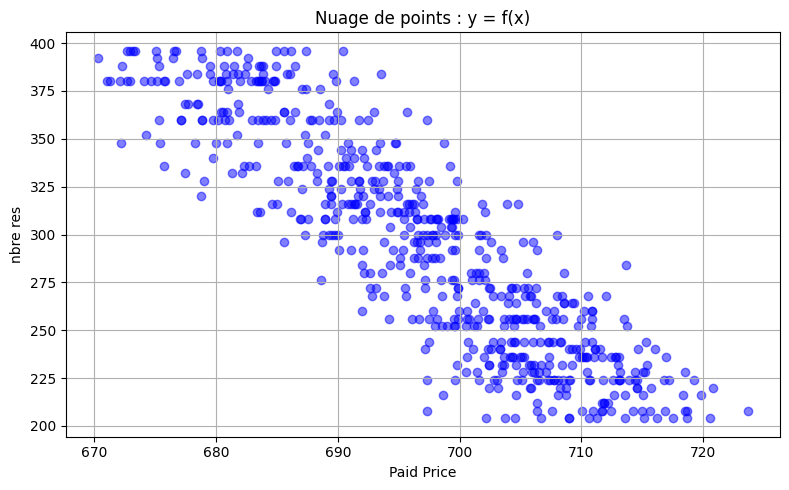

In [65]:
# Tracer les points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("Paid Price")
plt.ylabel("nbre res")
plt.title("Nuage de points : y = f(x)")
plt.grid(True)
plt.tight_layout()
plt.show()


--- Summary for 2th Expectile ---
ExpectileGAM                                                                                              
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.9683
Link Function:                     IdentityLink Log Likelihood:                                 -5063.2814
Number of Samples:                          602 AIC:                                            10146.4994
                                                AICc:                                           10146.8694
                                                GCV:                                             1842.1669
                                                Scale:                                           1792.8344
                                                Pseudo R-Squared:                                   0.4478
Fe

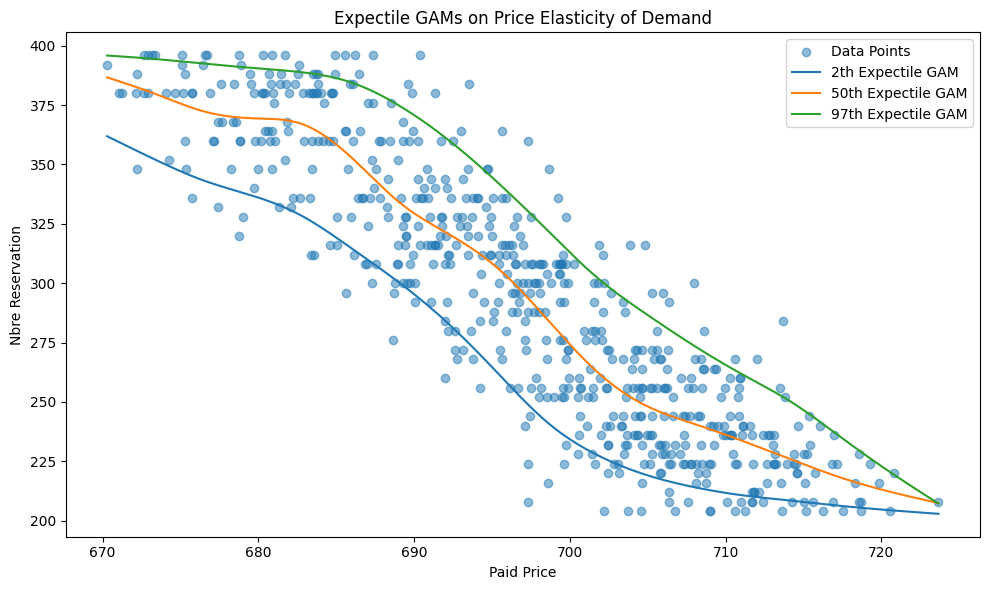

In [66]:
#Price_demand model with 
# Define expectiles (quantiles equivalent for ExpectileGAM)
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

# Fit an ExpectileGAM for each quantile
summaries = {}
for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[q] = gam
    print(f"\n--- Summary for {int(q*100)}th Expectile ---")
    print(gam.summary())  # Just call it; don't assign it

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')

# Create evenly spaced X values for predictions
XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Plot each fitted GAM curve
for q, gam in gam_results.items():
    plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Expectile GAM')

# Customize plot
plt.xlabel('Paid Price')
plt.ylabel('Nbre Reservation')
plt.title('Expectile GAMs on Price Elasticity of Demand')
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
#this model is valid for 2, 3, 4, 5, 9, 10, 11 months, room_type=single, week-end=false, no_promo
filtered_df = df[
    (df['arr month'].isin([2,3,4])) &
    (df['is-week-end'] == False) &
    (df['is_promo'] == False) &
    (df['type de chambre'] == 'family')&
    (df['booking lead'] <=10)
]

X = filtered_df[['paid price']]
y= filtered_df['nbre res']

print(len(X)) 

1028


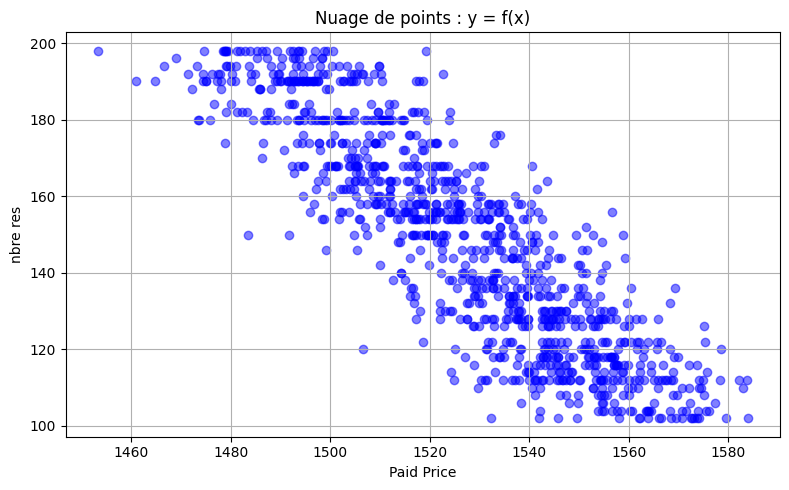

In [68]:
# Tracer les points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("Paid Price")
plt.ylabel("nbre res")
plt.title("Nuage de points : y = f(x)")
plt.grid(True)
plt.tight_layout()
plt.show()


--- Summary for 2th Expectile ---
ExpectileGAM                                                                                              
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.7236
Link Function:                     IdentityLink Log Likelihood:                                 -7326.2419
Number of Samples:                         1028 AIC:                                            14673.9311
                                                AICc:                                           14674.1785
                                                GCV:                                              504.6753
                                                Scale:                                            496.0901
                                                Pseudo R-Squared:                                   0.3753
Fe

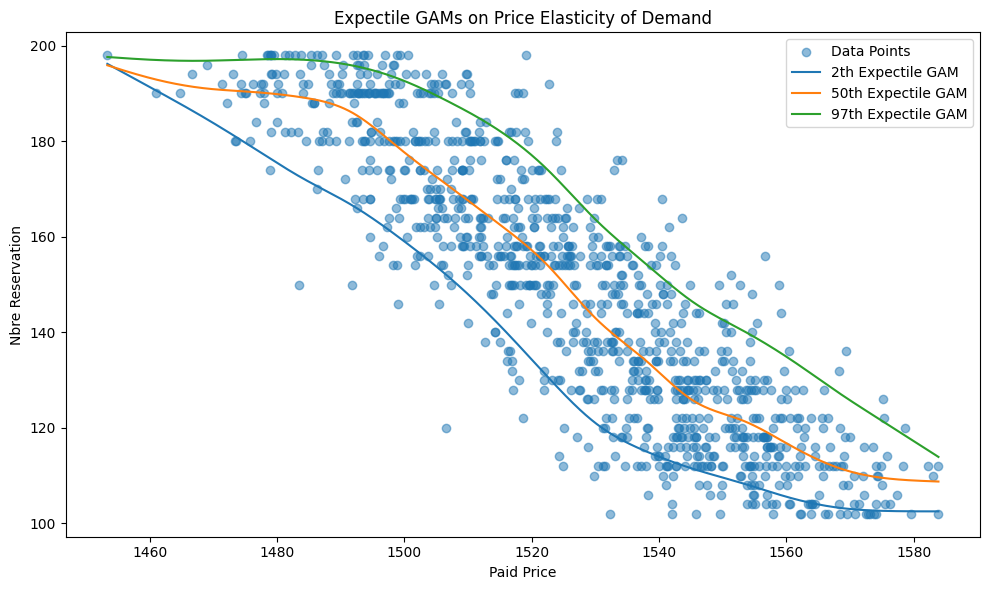

In [69]:
#Price_demand model with 
# Define expectiles (quantiles equivalent for ExpectileGAM)
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

# Fit an ExpectileGAM for each quantile
summaries = {}
for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[q] = gam
    print(f"\n--- Summary for {int(q*100)}th Expectile ---")
    print(gam.summary())  # Just call it; don't assign it

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')

# Create evenly spaced X values for predictions
XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Plot each fitted GAM curve
for q, gam in gam_results.items():
    plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Expectile GAM')

# Customize plot
plt.xlabel('Paid Price')
plt.ylabel('Nbre Reservation')
plt.title('Expectile GAMs on Price Elasticity of Demand')
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
#this model is valid for 2, 3, 4, 5, 9, 10, 11 months, room_type=single, week-end=false, no_promo
filtered_df = df[
    (df['arr month'].isin([2,3,4])) &
    (df['is-week-end'] == True) &
    (df['is_promo'] == False) &
    (df['type de chambre'] == 'family')&
    (df['booking lead'] <=5)
]

X = filtered_df[['paid price']]
y= filtered_df['nbre res']

print(len(X)) 

147


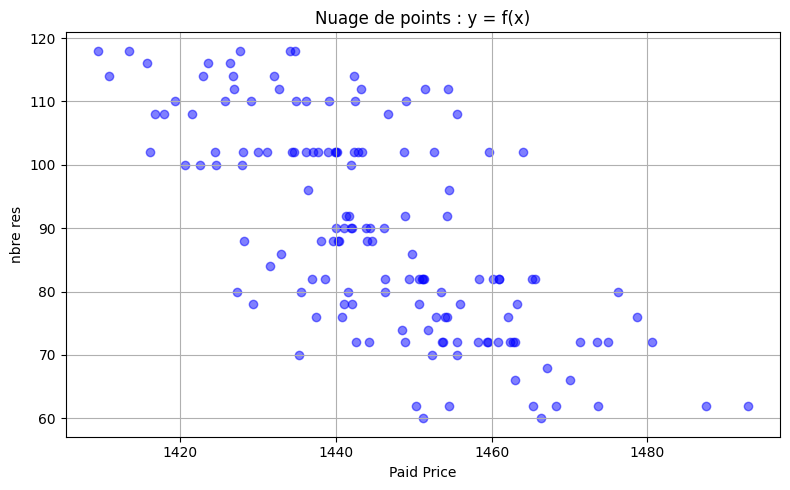

In [71]:
# Tracer les points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("Paid Price")
plt.ylabel("nbre res")
plt.title("Nuage de points : y = f(x)")
plt.grid(True)
plt.tight_layout()
plt.show()


--- Summary for 2th Expectile ---
ExpectileGAM                                                                                              
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.6538
Link Function:                     IdentityLink Log Likelihood:                                 -1006.7281
Number of Samples:                          147 AIC:                                              2028.764
                                                AICc:                                            2029.7215
                                                GCV:                                              408.6643
                                                Scale:                                            375.5085
                                                Pseudo R-Squared:                                  -0.3303
Fe

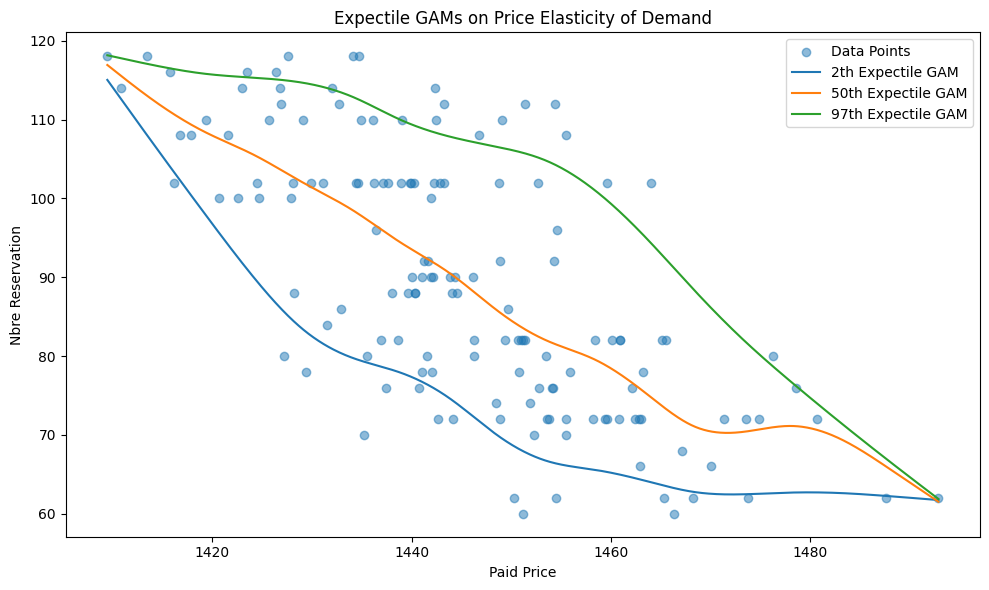

In [72]:
#Price_demand model with 
# Define expectiles (quantiles equivalent for ExpectileGAM)
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

# Fit an ExpectileGAM for each quantile
summaries = {}
for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[q] = gam
    print(f"\n--- Summary for {int(q*100)}th Expectile ---")
    print(gam.summary())  # Just call it; don't assign it

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')

# Create evenly spaced X values for predictions
XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Plot each fitted GAM curve
for q, gam in gam_results.items():
    plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Expectile GAM')

# Customize plot
plt.xlabel('Paid Price')
plt.ylabel('Nbre Reservation')
plt.title('Expectile GAMs on Price Elasticity of Demand')
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
#this model is valid for 2, 3, 4, 5, 9, 10, 11 months, room_type=single, week-end=false, no_promo
filtered_df = df[
    (df['arr month'].isin([2,3,4])) &
    (df['is-week-end'] == False) &
    (df['is_promo'] == True) &
    (df['type de chambre'] == 'single')&
    (df['booking lead'] <=10)
].drop_duplicates(subset=['res day'], keep='first')

X = filtered_df[['paid price']]
y= filtered_df['nbre res']

print(len(X)) 

150


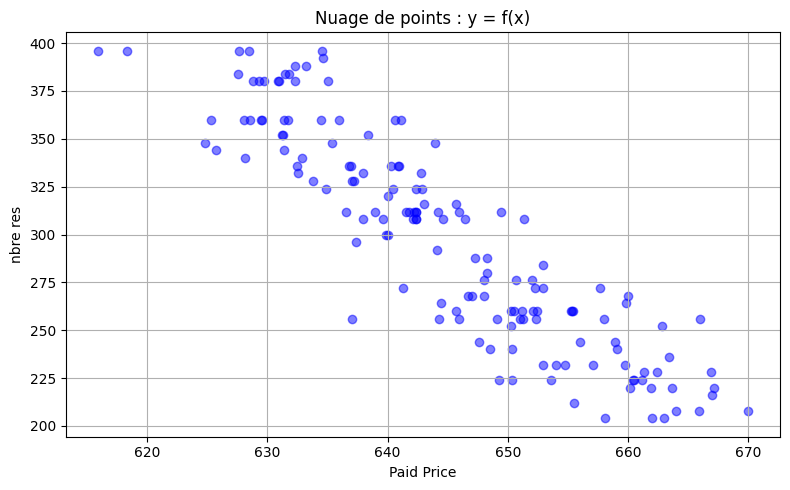

In [61]:
# Tracer les points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("Paid Price")
plt.ylabel("nbre res")
plt.title("Nuage de points : y = f(x)")
plt.grid(True)
plt.tight_layout()
plt.show()


--- Summary for 2th Expectile ---
ExpectileGAM                                                                                              
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.8528
Link Function:                     IdentityLink Log Likelihood:                                 -1233.1062
Number of Samples:                          150 AIC:                                              2481.918
                                                AICc:                                            2482.9031
                                                GCV:                                             1614.6589
                                                Scale:                                           1482.4439
                                                Pseudo R-Squared:                                   0.5338
Fe

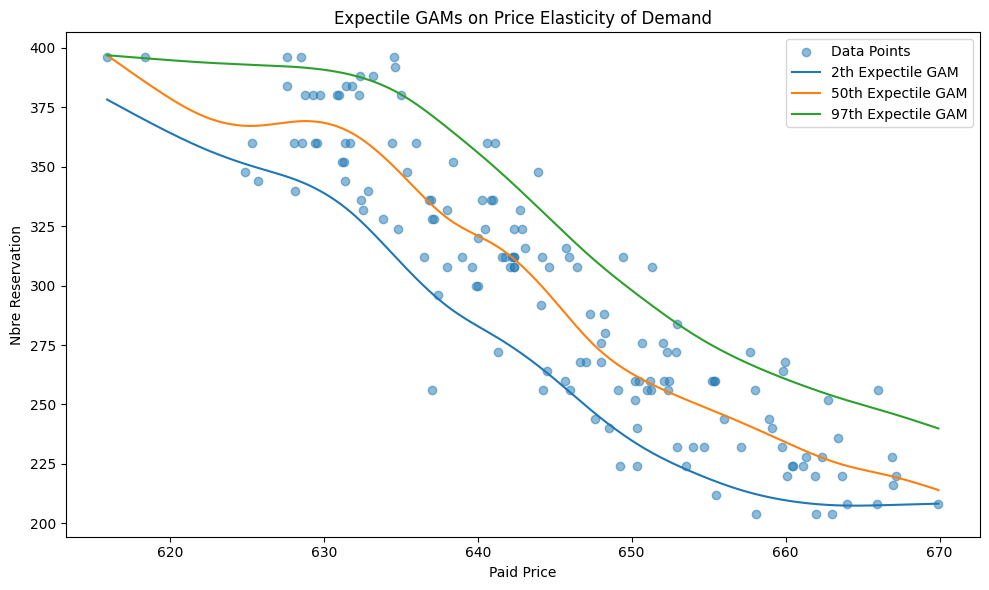

In [62]:
#Price_demand model with 
# Define expectiles (quantiles equivalent for ExpectileGAM)
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

# Fit an ExpectileGAM for each quantile
summaries = {}
for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[q] = gam
    print(f"\n--- Summary for {int(q*100)}th Expectile ---")
    print(gam.summary())  # Just call it; don't assign it

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')

# Create evenly spaced X values for predictions
XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Plot each fitted GAM curve
for q, gam in gam_results.items():
    plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Expectile GAM')

# Customize plot
plt.xlabel('Paid Price')
plt.ylabel('Nbre Reservation')
plt.title('Expectile GAMs on Price Elasticity of Demand')
plt.legend()
plt.tight_layout()
plt.show()